- https://company.hoteliers.com/about-us/industry-insights/insight-direct-hotel-bookings/ 
- https://www.travelline.pro/blog/why-direct-bookings-are-profitable-for-hotels/
- https://www.xola.com/articles/otas-vs-direct-booking-trends-in-2022/
- https://www.revfine.com/how-can-hotels-increase-their-direct-booking-volumes/
- https://blog.guestcentric.com/guestcentric-hotels-in-portugal-grow-16-in-2023/
- https://blog.guestcentric.com/personalization-vs-privacy-what-do-hotel-guests-prefer/?utm_source=latestnews&utm_campaign=newarticle&utm_source=latestnews&utm_campaign=newarticle&_gl=1*3rilix*_gcl_au*MTYyNzQ3MzMyMi4xNzA5NjQ3NDIx*_ga*OTY4NTE5NzI3LjE3MDk2NDc0MjE.*_ga_L72N25XXD6*MTcwOTY1MDE2OC4yLjEuMTcwOTY1MDI1Ny42MC4wLjA.&_ga=2.145367988.1469939492.1709647421-968519727.1709647421

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

In [2]:
hoteldf = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Business_Case1/main/Case1_HotelCustomerSegmentation.csv', delimiter=';')

In [3]:
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [4]:
hoteldf.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# profile = ProfileReport(hoteldf, title="Profile Report")
# profile.to_notebook_iframe()
# profile.to_file("businesscase1_profilereport.html")

In [6]:
### Alerts by Profile Report: 

# ID is highly overall correlated with DaysSinceCreation	High correlation
# DaysSinceCreation is highly overall correlated with ID	High correlation
# AverageLeadTime is highly overall correlated with LodgingRevenue and 4 other fields	High correlation
# LodgingRevenue is highly overall correlated with AverageLeadTime and 4 other fields	High correlation
# OtherRevenue is highly overall correlated with AverageLeadTime and 4 other fields	High correlation
# BookingsCheckedIn is highly overall correlated with AverageLeadTime and 4 other fields	High correlation
# PersonsNights is highly overall correlated with AverageLeadTime and 4 other fields	High correlation
# RoomNights is highly overall correlated with AverageLeadTime and 4 other fields	High correlation
# DistributionChannel is highly overall correlated with MarketSegment	High correlation
# MarketSegment is highly overall correlated with DistributionChannel	High correlation
# BookingsNoShowed is highly imbalanced (99.7%)	Imbalance
# DistributionChannel is highly imbalanced (57.8%)	Imbalance
# SRHighFloor is highly imbalanced (74.6%)	Imbalance
# SRLowFloor is highly imbalanced (98.6%)	Imbalance
# SRAccessibleRoom is highly imbalanced (99.7%)	Imbalance
# SRMediumFloor is highly imbalanced (99.1%)	Imbalance
# SRBathtub is highly imbalanced (96.9%)	Imbalance
# SRShower is highly imbalanced (98.3%)	Imbalance
# SRCrib is highly imbalanced (88.1%)	Imbalance
# SRNearElevator is highly imbalanced (99.6%)	Imbalance
# SRAwayFromElevator is highly imbalanced (96.6%)	Imbalance
# SRNoAlcoholInMiniBar is highly imbalanced (99.7%)	Imbalance
# SRQuietRoom is highly imbalanced (57.1%)	Imbalance
# Age has 4172 (3.7%) missing values	Missing
# BookingsCanceled is highly skewed (γ1 = 84.06919629)	Skewed
# BookingsCheckedIn is highly skewed (γ1 = 26.42580106)	Skewed
# ID is uniformly distributed	Uniform
# ID has unique values	Unique
# AverageLeadTime has 36678 (32.8%) zeros	Zeros
# LodgingRevenue has 33769 (30.2%) zeros	Zeros
# OtherRevenue has 33552 (30.0%) zeros	Zeros
# BookingsCanceled has 111567 (99.9%) zeros	Zeros
# BookingsCheckedIn has 33198 (29.7%) zeros	Zeros
# PersonsNights has 33202 (29.7%) zeros	Zeros
# RoomNights has 33198 (29.7%) zeros	Zeros

In [7]:
hoteldf.duplicated().sum()
# We dont have duplicated values

0

In [8]:
print(hoteldf['ID'].nunique())
print(hoteldf.shape[0])

111733
111733


Since the variable ID is unique we are going to define it as the index of the table.

In [9]:
hoteldf.set_index('ID', inplace=True)

In [10]:
hoteldf

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
hoteldf.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [12]:
hoteldf[hoteldf.isnull().any(axis=1)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,PRT,NaN,1385,0x792FE319C0867A1B48AED1DD032FAA5B0022E7FF5A35...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,63,224.00,156.0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111549,PRT,NaN,39,0x7B3319EA712262C2CCB36BD025636C8D95C32846F125...,NaN,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
111553,PRT,NaN,38,0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,204,381.60,91.2,0,0,...,0,0,0,0,1,0,0,0,0,0
111631,PRT,NaN,37,0xC3B0C105F99A992FAC2D08EC52356248A665821468CF...,NaN,0,0.00,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
hoteldf[hoteldf['Age'].isna()]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,PRT,NaN,1385,0x792FE319C0867A1B48AED1DD032FAA5B0022E7FF5A35...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,63,224.00,156.0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111549,PRT,NaN,39,0x7B3319EA712262C2CCB36BD025636C8D95C32846F125...,NaN,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
111553,PRT,NaN,38,0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,204,381.60,91.2,0,0,...,0,0,0,0,1,0,0,0,0,0
111631,PRT,NaN,37,0xC3B0C105F99A992FAC2D08EC52356248A665821468CF...,NaN,0,0.00,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


Every missing value in DocIDHash is also a missing value in Age

In [14]:
age_nans = hoteldf[hoteldf['Age'].isna()]['DocIDHash'].tolist()
filtered_df_age_nan = hoteldf[hoteldf['DocIDHash'].isin(age_nans)]
filtered_df_age_nan

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,PRT,NaN,1385,0x792FE319C0867A1B48AED1DD032FAA5B0022E7FF5A35...,0xC3A80CBEDB77EE428047B97BE4FF5EF90D5A0AB5C2AC...,63,224.00,156.0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111549,PRT,NaN,39,0x7B3319EA712262C2CCB36BD025636C8D95C32846F125...,NaN,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
111553,PRT,NaN,38,0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,204,381.60,91.2,0,0,...,0,0,0,0,1,0,0,0,0,0
111631,PRT,NaN,37,0xC3B0C105F99A992FAC2D08EC52356248A665821468CF...,NaN,0,0.00,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
print(f"There are {filtered_df_age_nan[~filtered_df_age_nan['Age'].isna()].shape[0]} rows that correspond to the missing values\
in age, i.e., with the same DocIDHash, so the same person.")

There are 231 rows that correspond to the missing valuesin age, i.e., with the same DocIDHash, so the same person.


In [16]:
age_nans_2 = filtered_df_age_nan[~filtered_df_age_nan['Age'].isna()]['DocIDHash'].tolist()
filtered_df_age_nan2 = hoteldf[hoteldf['DocIDHash'].isin(age_nans_2)]
filtered_df_age_nan2

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
60,PRT,NaN,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109890,PRT,NaN,51,0x931C54BCE9C4AF9C876BDE0E1266BDE69C32E5F7D66D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,75,616.60,72.0,0,0,...,0,0,0,0,0,1,0,0,0,0
110526,PRT,NaN,47,0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,98,119.00,88.0,0,0,...,0,0,0,0,0,0,0,0,0,0
110659,PRT,NaN,45,0x49DB5E9EC7539A405BA5F7AD3292887261A69E3A7015...,0x742F84D40C5401D0C3F09DB132D58E73FB32CD534A73...,23,59.00,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
filtered_df_age_nan2.isna().sum()[1]

2904

2904 rows of the 4172 total age missing values could be replaced by using a row with the same DocIDHash that has the age defined

### Nationalities

In [18]:
hoteldf['Nationality'].value_counts()

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
       ...  
BHS        1
TMP        1
TZA        1
PNG        1
BDI        1
Name: count, Length: 199, dtype: int64

In [19]:
hoteldf['Nationality'].nunique()

199

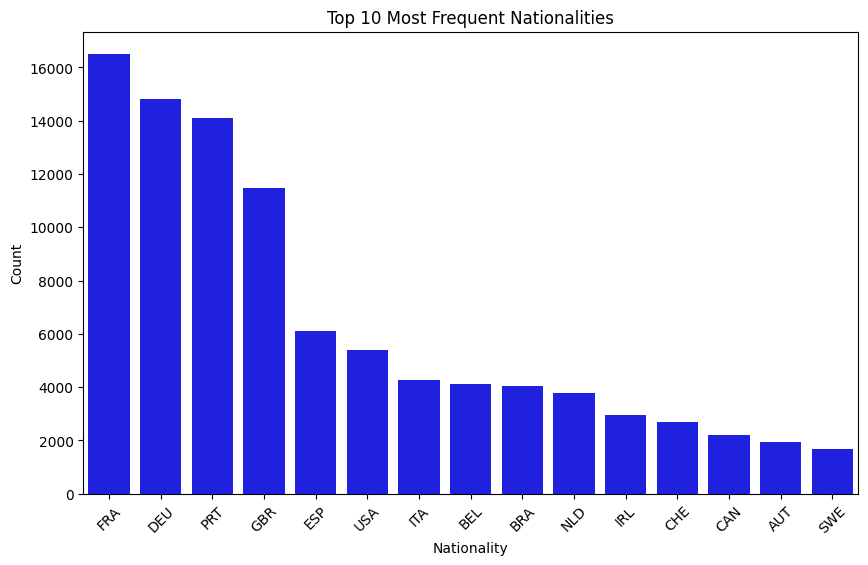

In [20]:
num_nations = 15
top_nations = hoteldf['Nationality'].value_counts().index.tolist()[:num_nations]

plt.figure(figsize=(10, 6))  

sns.countplot(x='Nationality', data=hoteldf, order=top_nations, color='blue')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Nationalities')
plt.xticks(rotation=45)  

plt.show()

### Boxplot

In [21]:
metric_var = ['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled',
       'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']

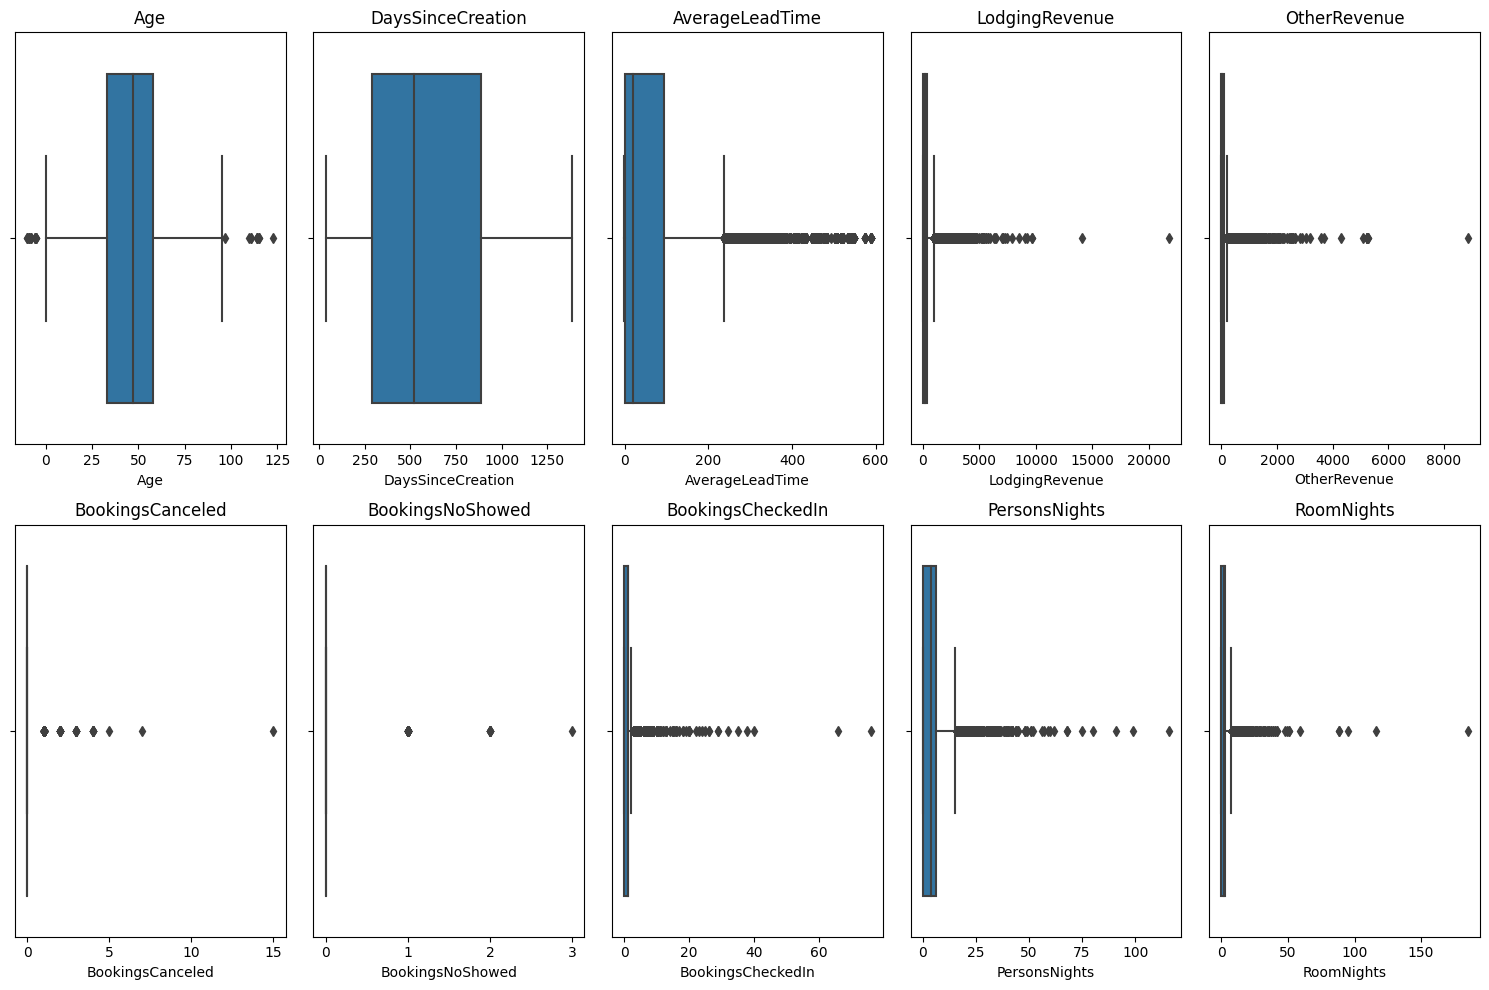

In [22]:
n_rows = int(np.ceil(len(metric_var) / 5))

fig, axs = plt.subplots(n_rows, 5, figsize=(15, n_rows * 5))

axs = axs.flatten()
for ax in axs[len(metric_var):]:
    fig.delaxes(ax)

for i, var in enumerate(metric_var):
    sns.boxplot(x=hoteldf[var], ax=axs[i])
    axs[i].set_title(f'{var}')

plt.tight_layout()
plt.show()

We should look into: 
- Age negative values & biggest values (>100)
- The biggest revenues (some outliers there) 
- The case/s where there are 15 Bookings Canceled
- The cases where BookingsCheckIn > 50
- The cases where PersonNights > 80
- The cases where RoomNights > 70 and specially the mode case which has > 150

### Age

In [23]:
hoteldf['Age'].value_counts()

Age
51.0     2582
52.0     2561
55.0     2557
50.0     2504
54.0     2493
         ... 
115.0       2
123.0       1
97.0        1
110.0       1
95.0        1
Name: count, Length: 106, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

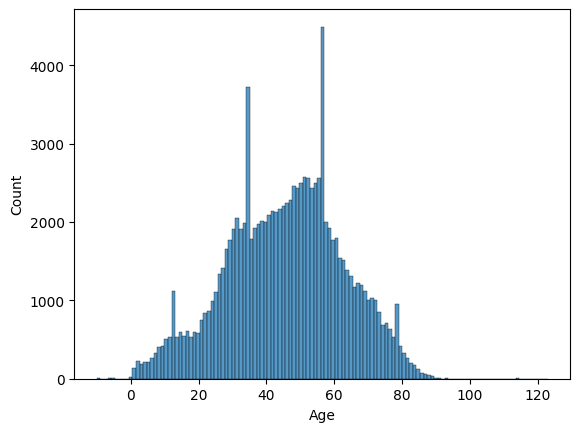

In [24]:
sns.histplot(x='Age', data=hoteldf)

proximo passo: verificar se existe um duplicado no DocIDHash dos casos de idade negativa e de idade superior a 100 anos

In [25]:
hoteldf[(hoteldf['Age'] < 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,...,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,...,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,...,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,...,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,...,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
negative_age_docid = hoteldf[hoteldf['Age'] < 0]['DocIDHash'].tolist()
filtered_df = hoteldf[hoteldf['DocIDHash'].isin(negative_age_docid)]
filtered_df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,...,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,...,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,...,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,...,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,...,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
hoteldf[(hoteldf['Age'] > 100)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,0x02D4575C7FE55631DBE81E8181066109AEFDCA58973F...,0xEC8ADED0F788BA1D46CEFF00FE180192B783BDA6F184...,22,79.0,25.5,0,0,...,0,0,0,0,1,0,0,0,0,0
18912,BEL,111.0,1058,0xE000EB79EF885B1FF6DFD46A6AD03211B70002271DD8...,0xB035518A17323A61553F309E937DC06F2CCC53E8E900...,215,140.0,164.8,0,0,...,0,0,0,0,0,0,0,0,0,0
25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.0,76.4,0,0,...,0,0,0,0,0,0,0,0,0,0
44525,DEU,114.0,627,0xAA6D4B36828028BE3F09FE5751DE971B7BE4B2BC038E...,0xD37FD9597B00ED4BC4EA2CB864521C48882E30DCA7AE...,7,234.0,34.5,0,0,...,0,0,0,0,1,0,0,0,0,0
45089,PRT,115.0,620,0xD906278493442999E6245450B8C306ABB9CA75F39032...,0xB207B868D8878FBBB1D449631EFDB684FAFC49AC57AF...,2,266.0,43.0,0,0,...,0,0,0,0,1,0,0,0,0,0
53298,ITA,123.0,543,0xE651AC190A6B9F1AEC6357AE26B7E871A54A7B5B3398...,0x21711474FF0CA1361823EDB5535B72CF6159EE1AEB43...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58052,AUT,114.0,503,0xA5F68A67139168CF952B006354B65964A2C38D79A4F5...,0xEDE630FB631373804FBF8325A0B48E67E8A8C575E7EF...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
64256,ESP,110.0,456,0x021B0CF360983B4B2F3E2F8E5932396CB2B1749EDDED...,0xABE5DDEDEC1FB4E00F82118EDEE61F525D5303E8E421...,0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
87089,PRT,111.0,244,0xCF1B6F56FF2AFF6FA1E6CC35C32AC8F1FA8006071ED0...,0x6C9FCBE39E3E519B9D2B0AACD3048888B287324F5508...,18,210.0,52.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
toobig_age_docid = hoteldf[hoteldf['Age'] > 100]['DocIDHash'].tolist()
filtered_df_100 = hoteldf[hoteldf['DocIDHash'].isin(toobig_age_docid)]
filtered_df_100.sort_values(by=['DocIDHash'])

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
39180,PRT,34.0,728,0xD8FD31FC3FF7E256214B39902FB74DFFE3A0DE55053C...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,54,271.32,8.0,0,0,...,0,0,0,0,1,0,0,0,0,0
17752,DEU,34.0,1077,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,6,210.00,20.5,0,0,...,0,0,0,0,0,0,0,0,0,0
53903,DEU,34.0,538,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,41,278.00,37.0,0,0,...,0,0,0,0,1,0,0,0,0,0
20742,DEU,34.0,1016,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,6,92.00,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21293,DEU,34.0,1001,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,4,184.00,34.3,0,0,...,0,0,0,0,0,0,0,0,0,0
22843,DEU,34.0,966,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,18,102.42,42.2,0,0,...,0,0,0,0,1,0,0,0,0,0
25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.00,76.4,0,0,...,0,0,0,0,0,0,0,0,0,0
42029,DEU,34.0,680,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,24,188.10,43.0,0,0,...,0,0,0,0,1,0,0,0,0,0
31409,DEU,34.0,839,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,14,121.60,34.8,0,0,...,0,0,0,0,1,0,0,0,0,0


As we can see above there are some cases (12) were the are duplicated people, so we can solve the overage outliers problem by choosing the most logic choice.

### Days Since Creation

<Axes: xlabel='DaysSinceCreation', ylabel='count'>

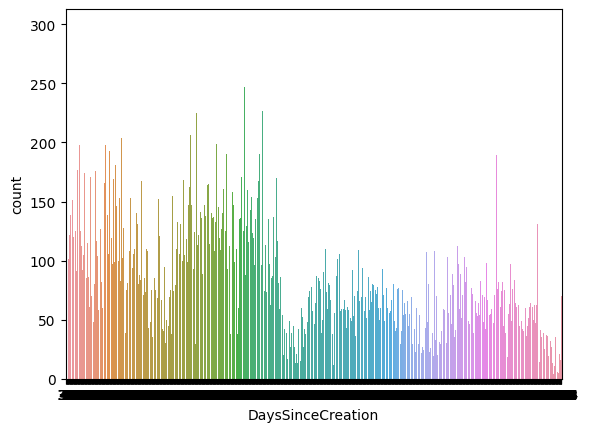

In [29]:
sns.countplot(x='DaysSinceCreation', data=hoteldf)

<Axes: xlabel='DaysSinceCreation', ylabel='Count'>

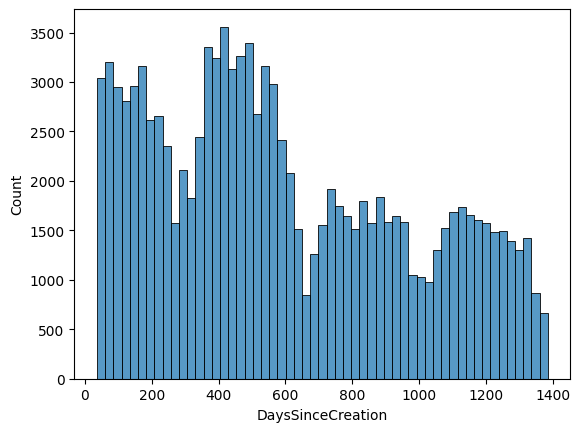

In [30]:
sns.histplot(x='DaysSinceCreation', data=hoteldf)

### Name Hash

In [31]:
hoteldf['NameHash'].value_counts()

NameHash
0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51EF134B078B9D61A8CC4A    75
0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC9AA009C2BD78D31BBB63    30
0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A960AD7D9A7FB4EC61D02F    21
0xD32FF3D74C193EF22762853A9F3DFAE05172A9537CCA78A8D519372EB35BB910    20
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD50    15
                                                                      ..
0x5A10B9327FB5DDC6415A75F4D34A888EC77A8E6BF26A3673C43F3EEFD93C9BC6     1
0x0E727EF33255C53456EB3B4180CE1F041AE58EAA7CA43A13CE7FD38DD4AB2B1C     1
0xF62DFF43A03E94F14864C756B7996436F09FE755A0443EC301467F1079153041     1
0xAF68558991D4F8C7315A850C73B76D49215FCC2C80E154CF585EEC598B711A91     1
0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2A6CCC2AAC27CF7326143     1
Name: count, Length: 107584, dtype: int64

In [32]:
hoteldf['NameHash'].nunique()

107584

In [33]:
print(f"There are {((hoteldf['NameHash'].nunique())*100)/hoteldf.shape[0]} of unique names in our data.")

There are 96.28668343282646 of unique names in our data.


In [34]:
print(f"We have {hoteldf.shape[0] - hoteldf['NameHash'].nunique()} repeated name values.")

We have 4149 repeated name values.


### Doc ID Hash

In [35]:
hoteldf['DocIDHash'].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3032
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0x7EC8BADB993449373704A84592ED36BF9CD7152809C94A663A831049FBB74F1F       1
0x5825AA46E4884EF879A26E514C9D0E91AAE46494F128B0AD44D81AD639DD5A26       1
0x68C8B2108F69FF2A322604377D0DE06789F07832D156036729C355779937BEF2       1
0x5374A726D76E12468AE43D19578A8E3B298D7F73FDF68AAD3831B003EECBBFC4       1
0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7CE438BCBA07BB1012304       1
Name: count, Length: 103480, dtype: int64

Why is there a client with 3032 entries in the database? This is the question that comes to our heads after seing what is displayed above. Maybe it is the owner of the hotel?

In [36]:
anomaly = hoteldf[hoteldf['DocIDHash']=='0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']
anomaly

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,PRT,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,PRT,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,PRT,NaN,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.5,0,0,...,0,0,0,0,0,0,0,0,0,0
60,PRT,NaN,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109484,PRT,NaN,54,0xA011EA37E7B0E7AFCF0B891BC8806A9421A8B6D1291D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,36,708.00,272.5,0,0,...,0,0,0,0,0,0,0,0,0,0
109890,PRT,NaN,51,0x931C54BCE9C4AF9C876BDE0E1266BDE69C32E5F7D66D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,75,616.60,72.0,0,0,...,0,0,0,0,0,1,0,0,0,0
110526,PRT,NaN,47,0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,98,119.00,88.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
anomaly['Nationality'].value_counts()

Nationality
PRT    3030
PAN       1
ESP       1
Name: count, dtype: int64

In [120]:
anomaly['NameHash'].value_counts()

NameHash
0x5175AC9E84362C505AED3E76F20320BE69DD1C21AA67E9B7156246CFA892423F    10
0x980FA177B3D2F00420A96C437ED2EB8AC43B2037D086511612D115466E2B35BE     8
0x57875DF029939F73857E321CF04081870E118531CE2914AA30DE15584B1D8511     8
0x7CF54101C640D8C370BCE3FCE66B152E095ABA0E9580238C9ABFC6B1CDA7CDFC     5
0xD9BEF42E436933B3CB1E932F0D7682A10303ACEDD62E0DC4EE5AEE2AF4C22A69     4
                                                                      ..
0xB9CD557B2D051DB4A465AC4EE5D57448F6456A67DBB83DBB0A7C100A210B508D     1
0x36773B8ABA6CBC922450FDC4055CCEB4162B52E1D54E6D20D562E98966F93629     1
0x7EBECC4D951B643E4CAE61AA1755EB30880E51FF8E6BA32D79620B720BEFA6A3     1
0xF9EE94E9B180183D295537FF365DCF11FB3B40F258E70361B422D8F50ACDC2A9     1
0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960DFD35D0352E4C1E3D6A2     1
Name: count, Length: 2826, dtype: int64

In [38]:
anomaly['Age'].value_counts()

Age
34.0    8
25.0    6
31.0    6
30.0    5
59.0    5
       ..
2.0     1
58.0    1
70.0    1
67.0    1
6.0     1
Name: count, Length: 63, dtype: int64

In [39]:
anomaly['Age'].max()

83.0

In [40]:
anomaly['Age'].min()

2.0

In [41]:
anomaly['DaysSinceCreation'].max()

1385

There are definitely stuff to explore in this client (anomaly), we should dig up more on this!

In [42]:
hoteldf.shape[0] - hoteldf['DocIDHash'].nunique()

8253

In [43]:
((hoteldf.shape[0] - hoteldf['DocIDHash'].nunique())*100)/hoteldf.shape[0]

7.386358551188995

Above we can see the number of duplicated clients and realise it is almost 7.4% of our data. We should consider removing this values probably but before that we should analyse it a bit deeper.

### Average Lead Time

In [45]:
hoteldf['AverageLeadTime'].nunique()

424

<Axes: xlabel='AverageLeadTime', ylabel='Count'>

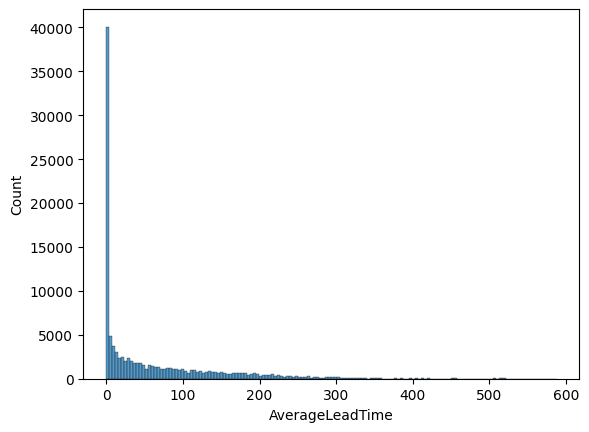

In [46]:
sns.histplot(x='AverageLeadTime', data=hoteldf)

In [47]:
speedy_gonzales = hoteldf[hoteldf['AverageLeadTime']==0]
speedy_gonzales

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
speedy_gonzales['Nationality'].value_counts()

Nationality
FRA    5387
DEU    4548
PRT    4433
GBR    3544
USA    2215
       ... 
BWA       1
VCT       1
PRI       1
FJI       1
BDI       1
Name: count, Length: 173, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

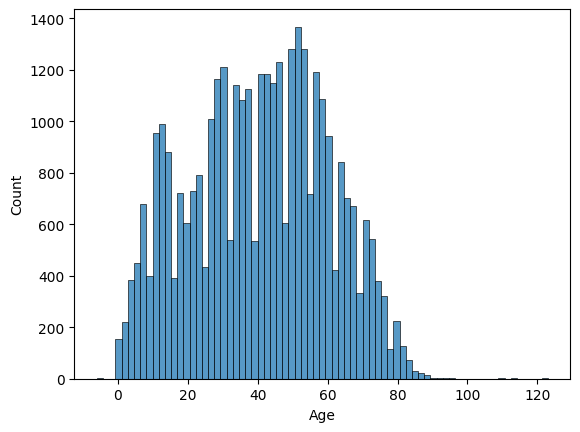

In [49]:
sns.histplot(x='Age', data=speedy_gonzales)

We can see a trend here, it increases as people begin to work and have more success and then it decreases as people get older and begin to retire and/or be less active.

In [50]:
speedy_gonzales.shape[0]*100/hoteldf.shape[0]

32.826470246032954

We can explore more the speedy gonzales clients, they are a significant part of our clientele, almost 33%.

### Lodging Revenue

In [51]:
hoteldf['LodgingRevenue'].value_counts()

LodgingRevenue
0.00      33769
176.00      988
126.00      673
234.00      592
264.00      551
          ...  
605.10        1
846.16        1
421.68        1
391.28        1
173.55        1
Name: count, Length: 12689, dtype: int64

In [52]:
hoteldf[hoteldf['LodgingRevenue']==0].shape[0]*100/hoteldf.shape[0]

30.222942192548306

30% of our clients, so almost a third of them, have not paid a cent in terms of lodging.

In [53]:
lazy_clients = hoteldf[hoteldf['LodgingRevenue']==0]

<Axes: xlabel='Age', ylabel='Count'>

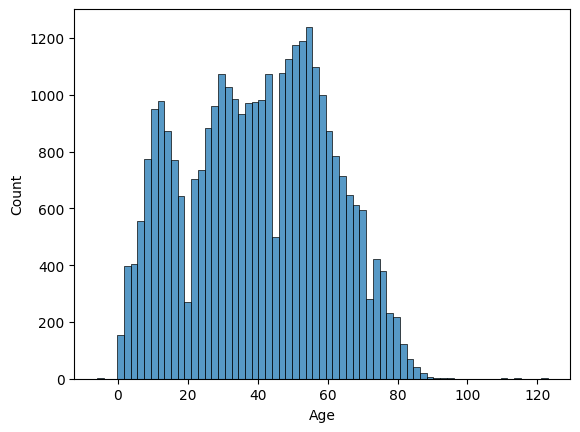

In [54]:
sns.histplot(x='Age', data=lazy_clients)

I was expecting a much higher tendence for younger clients since they go with their parents so they don´t pay normally.

In [55]:
money_clients = hoteldf[hoteldf['LodgingRevenue']!=0]

<Axes: xlabel='LodgingRevenue', ylabel='Count'>

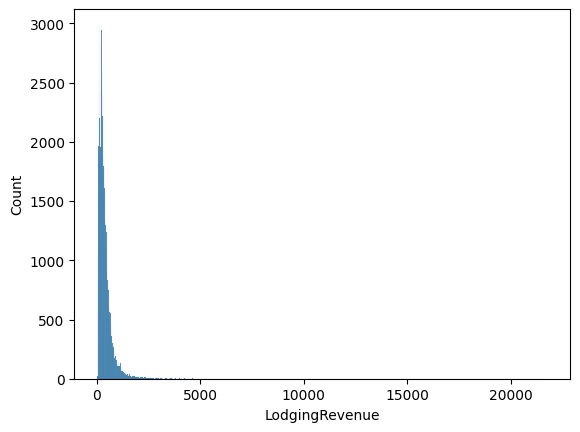

In [56]:
sns.histplot(x='LodgingRevenue', data=money_clients)

### Other Revenue

In [57]:
hoteldf['OtherRevenue'].value_counts()

OtherRevenue
0.00       33552
42.00       3030
14.00       2913
28.00       2328
56.00       1723
           ...  
260.20         1
1319.00        1
61.90          1
613.79         1
216.10         1
Name: count, Length: 5338, dtype: int64

In [58]:
hoteldf[hoteldf['OtherRevenue']==0].shape[0]*100/hoteldf.shape[0]

30.02872920265275

We have the same tendencie here, basically the same %.

In [59]:
hoteldf[hoteldf['OtherRevenue']==0][['LodgingRevenue','OtherRevenue']]

,LodgingRevenue,OtherRevenue
ID,,
3,0.0,0.0
5,0.0,0.0
7,0.0,0.0
9,0.0,0.0
11,0.0,0.0
...,...,...
111724,0.0,0.0
111726,0.0,0.0
111729,0.0,0.0


We can see above that there is a tendency.

### Bookings Canceled

In [60]:
hoteldf['BookingsCanceled'].value_counts()

BookingsCanceled
0     111567
1        125
2         19
3         11
4          8
15         1
7          1
5          1
Name: count, dtype: int64

In [61]:
hoteldf[hoteldf['BookingsCanceled']==0].shape[0]*100/hoteldf.shape[0]

99.85143153768358

As we can see only 0.15% of our clients cancel the reservations which is of course and extremelly good sign.

In [62]:
boo_clients = hoteldf[hoteldf['BookingsCanceled']!=0]
boo_clients

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.30,1,0,...,0,0,0,0,0,0,0,0,0,0
569,PRT,48.0,1367,0xF2C2CA65C29BCF50519579A1BA387CD85D4A476F058B...,0x9E6EE77E0CE36F5633402DF0D142F58CFFA836F020D7...,79,355.0,81.00,3,0,...,0,0,0,0,1,0,0,0,0,0
575,PRT,54.0,1366,0x66458A811C5E603E5722AE10EE5272FD804EE0999F41...,0xF0FC75EF8461932A8A0653883FF52D105CF88CD34225...,1,1005.0,393.50,1,0,...,0,0,0,0,0,0,0,0,0,0
630,PRT,46.0,1362,0x65A26CC5AA4DA0FE145C848C955F2D8A7F852DB78547...,0x5E9904C097C496B8C002D9E7F9F1AC145252C226DBB7...,1,0.0,0.00,1,0,...,0,0,0,0,1,0,0,0,0,0
1512,PRT,56.0,1336,0x1E9343C0759C9B40597755DE0B7CD548E15563587D69...,0xD7E8A1808B8EEC122EB5235373CC66FF8AC483A8249F...,4,2101.0,246.85,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92518,FRA,69.0,193,0x726311A34E458B2FA6DDF603CEA93EE866C8CB0E4ADE...,0xB16C7113A57EE37724A7DDF0103C89FBD2B6324B600E...,11,5754.0,1593.90,1,0,...,0,0,0,0,1,0,0,0,0,1
92521,FRA,68.0,193,0xAE2AA91576F40EE75E1AF19F54464546452F245978AA...,0xDFAF5B1363CD2E06F60FCEBF93752E79F7303276108A...,11,5754.0,1393.00,1,0,...,0,0,0,0,1,0,0,0,0,0
93137,PRT,NaN,188,0x7B08156D0FA9D4E88C8E4C3F0ED5AD8D69927E10B9F3...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,30,102.0,12.00,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
boo_clients['Age'].mean()

51.0863309352518

We can conclude by this average that this is probably business clients (majority), more investigation needed.

In [64]:
boo_clients['AverageLeadTime'].mean()

20.698795180722893

In [65]:
boo_clients['Nationality'].value_counts()

Nationality
PRT    119
ESP      8
FRA      8
GRC      5
ITA      4
BEL      3
NLD      3
CAN      2
GBR      2
SWE      2
BRA      1
AGO      1
POL      1
USA      1
CYP      1
NAM      1
DZA      1
AUT      1
ZAF      1
SVN      1
Name: count, dtype: int64

We can see a pattern here, 119 of our 166 clients that cancelled, at least once, are portuguese clients.

### Bookings No Showed

In [66]:
hoteldf['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    111676
1        48
2         8
3         1
Name: count, dtype: int64

In [67]:
hoteldf[hoteldf['BookingsNoShowed']==0].shape[0]*100/hoteldf.shape[0]

99.94898552799978

In [68]:
double_boo_clients = hoteldf[hoteldf['BookingsNoShowed']!=0]
double_boo_clients

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
376,PRT,NaN,1381,0x0B320AC337920E7F0C4E21CD5260B2147D83BB65E480...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,68.00,14.00,0,1,...,0,0,0,0,0,0,0,0,0,0
379,PRT,45.0,1381,0x1807CF24CEE774AE27B94BF054672CCCA0ACCDE2DE0A...,0xB9E8FB9C662CC3FDDF9F55E213E0F3BF59537450394C...,2,1086.00,162.00,0,1,...,0,0,0,0,0,1,0,0,0,0
417,AGO,53.0,1378,0x05842189D4980DE3E463F1C49202001E6D433F246F48...,0x2A84DA7C5E0703A07903A23A1077A93D01F041FA3F50...,0,75.00,2.00,0,1,...,0,0,0,0,0,1,0,0,0,0
928,ESP,57.0,1351,0xD47478D7647A16F8679FF66BD629A1B436E9544A94BC...,0xBE3B88830D94C45CF18A1BF8B36D2A4782FD14CE46B2...,3,219.00,32.50,0,2,...,0,0,0,0,0,0,0,0,0,0
1808,GBR,45.0,1330,0x25CBCCE8943BF4F2532AE1EA55346BDE62358BC66873...,0xA123FE7357FD903B109B9324FEF8FEA86C06C1CD5A9F...,10,302.00,35.00,0,1,...,0,0,0,0,1,0,0,0,0,0
2160,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.50,3,1,...,0,0,0,0,1,0,0,0,0,0
2195,PRT,31.0,1322,0xBB3CF9AE87C477B1B8C6A74FC91EC6D0C912C58E4641...,0x71D7A5D69355E5B1E7D6F42502BFCE2D7175BC79EB6A...,18,53.00,14.00,0,1,...,0,0,0,0,0,1,0,0,0,0
3776,PRT,41.0,1295,0x444EB58CD6E2EBD7F1FEB432CBDC479E2547A695E7B8...,0x07589FC8EEC3A30BE3EC554D4F3449D2AAE2C4F6F5ED...,6,3910.00,433.50,2,1,...,0,0,0,0,0,0,0,0,0,0
4639,PRT,43.0,1280,0x726001EEFD31E685F4825A86BF5AB93317130FA78E92...,0xE0D5B85462840B7C0265DBF6EE0F9B677196AD247C53...,4,540.00,35.00,0,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
double_boo_clients['Age'].mean()

52.0

Same conclusion as in Bookings Cancelled, probably business clients.

In [70]:
double_boo_clients['AverageLeadTime'].mean()

18.36842105263158

In [71]:
double_boo_clients['Nationality'].value_counts()

Nationality
PRT    42
GBR     2
SWE     2
AGO     1
ESP     1
HRV     1
BEL     1
AUT     1
USA     1
FRA     1
PAN     1
DEU     1
ISR     1
NLD     1
Name: count, dtype: int64

Same as previously, portuguese reign here.

### Bookings Checked In

In [73]:
hoteldf['BookingsCheckedIn'].value_counts()

BookingsCheckedIn
1     76474
0     33198
2      1634
3       201
4        57
5        33
7        30
6        19
9        13
8        12
10       12
15        7
11        7
16        5
13        5
20        4
12        3
29        2
26        2
18        2
40        1
22        1
24        1
19        1
25        1
14        1
23        1
76        1
66        1
32        1
17        1
38        1
35        1
Name: count, dtype: int64

In [74]:
hoteldf[hoteldf['BookingsCheckedIn']==1].shape[0]*100/hoteldf.shape[0]

68.44352160955134

Almost 70% of our clients have checkin and consequently stayed at our hotel 1 time, which is pretty big indicator.

In [75]:
just_checking = hoteldf[hoteldf['BookingsCheckedIn']==0]
just_checking2 = just_checking[['BookingsCheckedIn','BookingsCanceled']]
just_checking2

,BookingsCheckedIn,BookingsCanceled
ID,,
3,0,0
5,0,0
7,0,0
9,0,0
11,0,0
...,...,...
111724,0,0
111726,0,0
111729,0,0


In [76]:
just_checking2['BookingsCanceled'].value_counts()

BookingsCanceled
0    33197
2        1
Name: count, dtype: int64

This 1 outlier probably should be removed.

### Persons Nights

In [77]:
hoteldf['PersonsNights'].value_counts()

PersonsNights
0      33202
6      16328
4      12926
2      11815
8      10245
1       5147
3       4964
10      4296
12      3931
9       2253
14      1845
5       1116
15       864
16       659
18       492
21       412
7        291
20       276
24       161
28        91
30        53
22        51
11        45
27        41
32        24
26        23
13        22
33        21
36        21
17        18
19        14
25        12
42         9
23         8
35         7
40         6
34         5
39         5
44         4
48         3
38         3
45         2
29         2
31         2
68         2
51         2
80         1
59         1
91         1
37         1
57         1
41         1
49         1
52         1
116        1
56         1
99         1
75         1
62         1
60         1
Name: count, dtype: int64

After 0 the most frequent values are 6, 4, 2 and 8, which all of them are even so either could be indicated of a even number of days stayed, or the more likelly, an even number of people which could leed to think that there is a good percentage of them that are couples.

<Axes: xlabel='PersonsNights', ylabel='Count'>

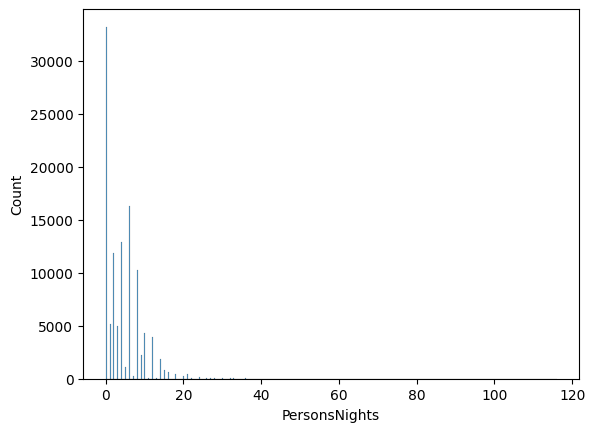

In [78]:
sns.histplot(x='PersonsNights', data=hoteldf)

### Rooom Nights

In [80]:
hoteldf['RoomNights'].value_counts()

RoomNights
0      33198
3      20706
2      17484
4      14050
1      13665
5       6248
7       2570
6       2424
8        505
9        271
10       199
11        97
12        71
14        53
15        36
13        34
19        14
17        13
16        13
21        12
18        10
22         8
26         6
24         4
28         4
32         3
20         3
31         3
42         2
40         2
33         2
37         2
39         2
88         2
51         2
36         2
25         1
48         1
49         1
27         1
95         1
35         1
30         1
185        1
34         1
23         1
29         1
116        1
59         1
Name: count, dtype: int64

Here unlike previously there is no pattern of even numbers, which can support our previously theory. Here the numbers are more less sequential (one by one almost), in a sense that the higher the number the less frequent it is, which is expected.

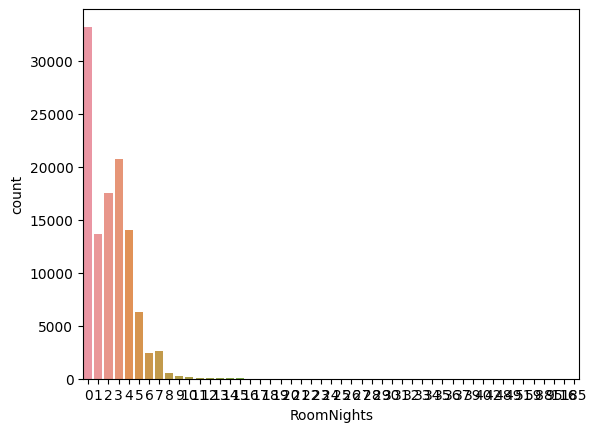

In [81]:
sns.countplot(x='RoomNights', data=hoteldf)
plt.show()

### Distribution Channel 

In [82]:
hoteldf['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator    91019
Direct                   16883
Corporate                 3135
GDS Systems                696
Name: count, dtype: int64

In [83]:
hoteldf['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator    91019
Direct                   16883
Corporate                 3135
GDS Systems                696
Name: count, dtype: int64

In [84]:
hoteldf[hoteldf['DistributionChannel']=='Travel Agent/Operator'].shape[0]*100/hoteldf.shape[0]

81.46116187697457

More less 80% of our clients came from a Travel Agency/Operator.

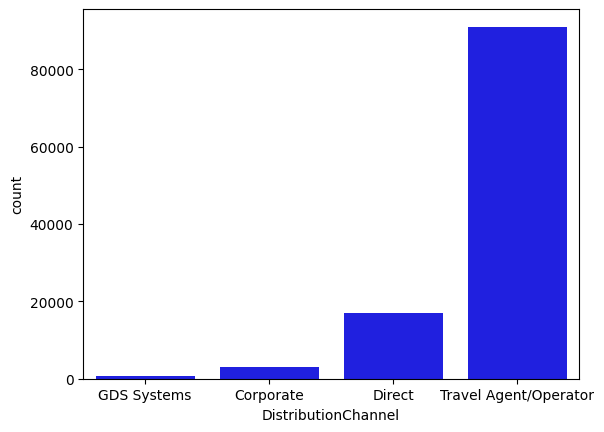

In [85]:
order = hoteldf['DistributionChannel'].value_counts(ascending=True).index
sns.countplot(x='DistributionChannel', data=hoteldf, color='blue', order=order)
plt.show()

### Market Segment

In [86]:
hoteldf['MarketSegment'].value_counts()

MarketSegment
Other                    63680
Direct                   16363
Travel Agent/Operator    16353
Groups                   11461
Corporate                 2931
Complementary              657
Aviation                   288
Name: count, dtype: int64

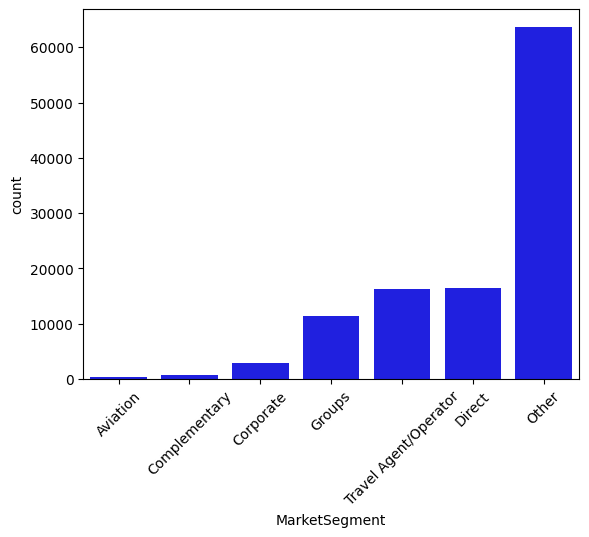

In [87]:
order2 = hoteldf['MarketSegment'].value_counts(ascending=True).index
sns.countplot(x='MarketSegment', data=hoteldf, color='blue', order=order2)
plt.xticks(rotation=45)  
plt.show()

### Special Requests Variables

In [89]:
hoteldf['SRHighFloor'].value_counts()

SRHighFloor
0    106983
1      4750
Name: count, dtype: int64

In [90]:
hoteldf['SRMediumFloor'].value_counts()

SRMediumFloor
0    111647
1        86
Name: count, dtype: int64

In [91]:
hoteldf['SRLowFloor'].value_counts()

SRLowFloor
0    111587
1       146
Name: count, dtype: int64

In [92]:
hoteldf['SRFloors'] = hoteldf['SRMediumFloor'] + hoteldf['SRHighFloor'] + hoteldf['SRLowFloor']
hoteldf['SRFloors'].value_counts()

SRFloors
0    106754
1      4976
2         3
Name: count, dtype: int64

In [93]:
hoteldf['SRAccessibleRoom'].value_counts()

SRAccessibleRoom
0    111708
1        25
Name: count, dtype: int64

In [94]:
hoteldf['SRQuietRoom'].value_counts()

SRQuietRoom
0    101932
1      9801
Name: count, dtype: int64

In [95]:
hoteldf['SRNearElevator'].value_counts()

SRNearElevator
0    111696
1        37
Name: count, dtype: int64

In [96]:
hoteldf['SRAwayFromElevator'].value_counts()

SRAwayFromElevator
0    111331
1       402
Name: count, dtype: int64

In [97]:
hoteldf['SRLowNoise'] = hoteldf['SRQuietRoom'] + hoteldf['SRAwayFromElevator']
hoteldf['SRLowNoise'].value_counts()

SRLowNoise
0    101690
1      9883
2       160
Name: count, dtype: int64

In [98]:
hoteldf['SREasyAcess'] = hoteldf['SRAccessibleRoom'] + hoteldf['SRNearElevator']
hoteldf['SREasyAcess'].value_counts()

SREasyAcess
0    111674
1        56
2         3
Name: count, dtype: int64

In [99]:
hoteldf['SRNoAlcoholInMiniBar'].value_counts()

SRNoAlcoholInMiniBar
0    111711
1        22
Name: count, dtype: int64

In [100]:
hoteldf['SRCrib'].value_counts()

SRCrib
0    109925
1      1808
Name: count, dtype: int64

In [101]:
hoteldf['SRKids'] = hoteldf['SRNoAlcoholInMiniBar'] + hoteldf['SRCrib']
hoteldf['SRKids'].value_counts()

SRKids
0    109906
1      1824
2         3
Name: count, dtype: int64

In [102]:
hoteldf['SRBathtub'].value_counts()

SRBathtub
0    111383
1       350
Name: count, dtype: int64

In [103]:
hoteldf['SRShower'].value_counts()

SRShower
0    111551
1       182
Name: count, dtype: int64

In [104]:
hoteldf['SRKingSizeBed'].value_counts()

SRKingSizeBed
0    71144
1    40589
Name: count, dtype: int64

In [105]:
hoteldf['SRTwinBed'].value_counts()

SRTwinBed
0    94212
1    17521
Name: count, dtype: int64

In [106]:
hoteldf['SRAll'] = hoteldf['SRHighFloor'] + hoteldf['SRLowFloor'] + hoteldf['SRAccessibleRoom'] + hoteldf['SRMediumFloor'] +\
        hoteldf['SRBathtub'] + hoteldf['SRShower'] + hoteldf['SRCrib'] + hoteldf['SRKingSizeBed'] + hoteldf['SRTwinBed'] +\
        hoteldf['SRNearElevator'] + hoteldf['SRAwayFromElevator'] + hoteldf['SRNoAlcoholInMiniBar'] + hoteldf['SRQuietRoom']
hoteldf['SRAll'].value_counts()

SRAll
1    51115
0    48882
2    10681
3      978
4       77
Name: count, dtype: int64

The majority of clients make at least 1 Special Request.

In [107]:
boolean_vars = ['BookingsCanceled','BookingsNoShowed', 'BookingsCheckedIn','SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'SRFloors', 'SRLowNoise',
       'SREasyAcess', 'SRKids']

In [108]:
len(boolean_vars)

20

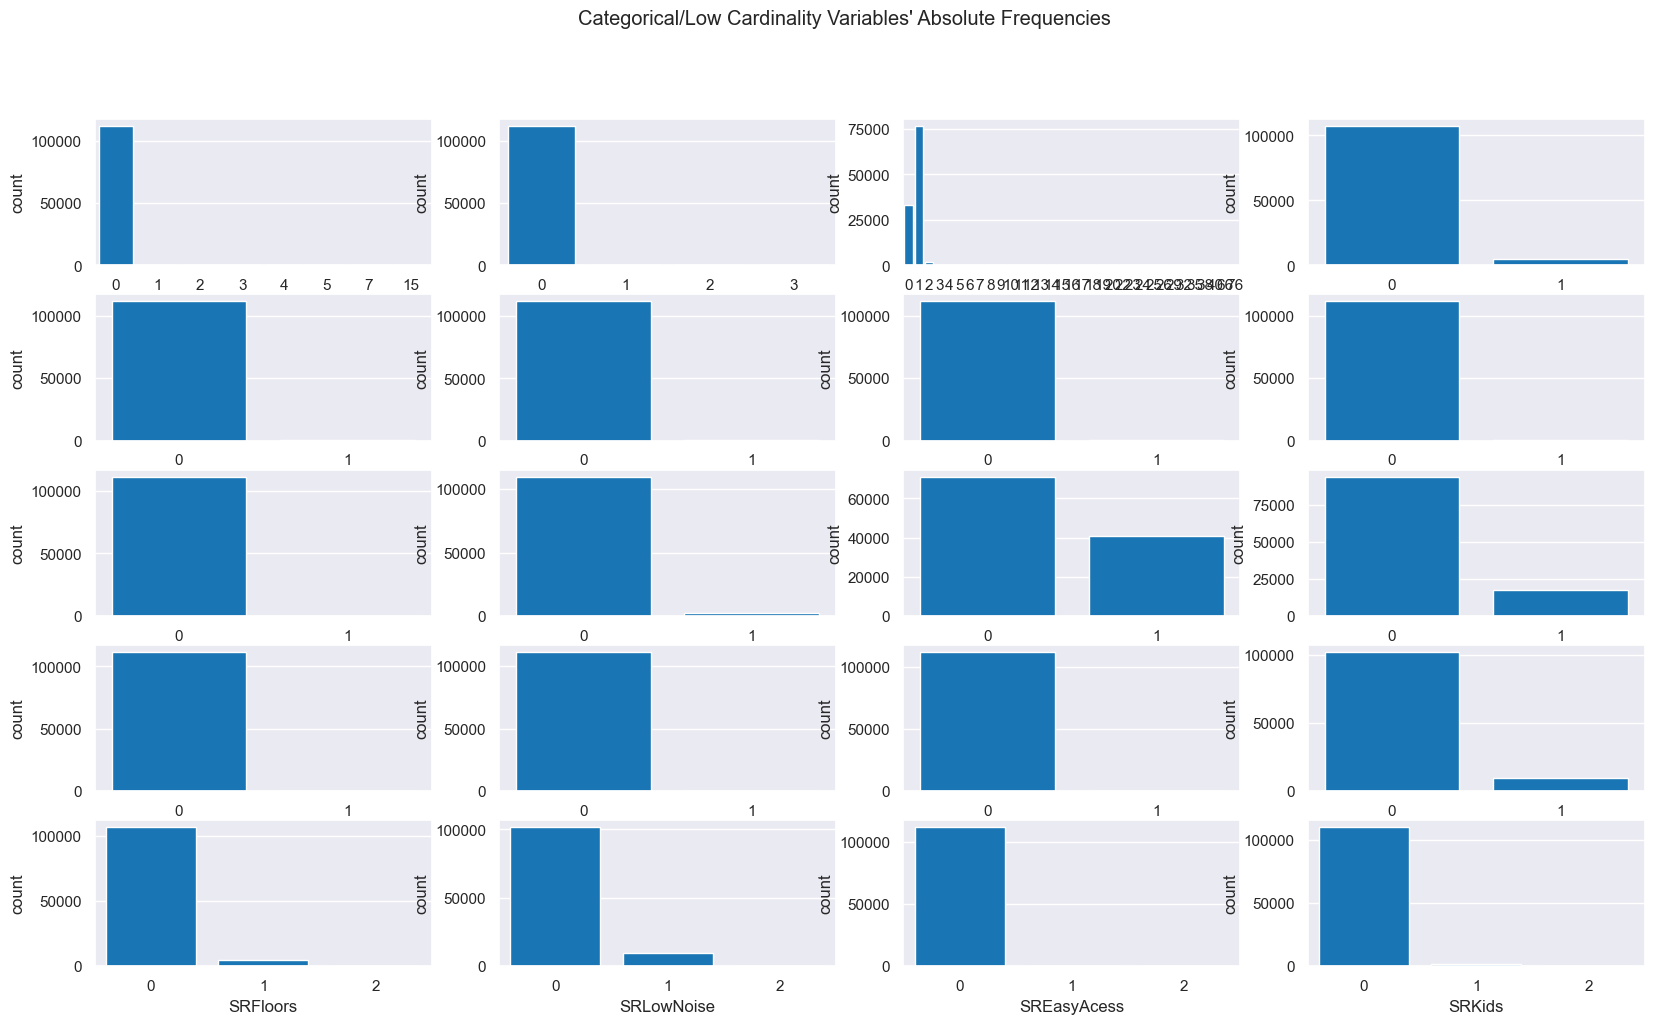

In [109]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

fig, axes = plt.subplots(5, ceil(len(boolean_vars) / 5), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), boolean_vars): 
    sns.countplot(x=hoteldf[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

In [110]:
def cor_heatmap(cor):
    plt.figure(figsize=(8,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.01')
    plt.show()

In [111]:
cor_spearman = hoteldf[metric_var].corr(method ='spearman')
cor_spearman

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
Age,1.000000,0.114063,0.229941,0.116780,0.211849,0.012175,0.008330,0.180666,0.147174,0.152153
DaysSinceCreation,0.114063,1.000000,0.278952,0.237191,0.306552,0.021295,0.015678,0.382513,0.314464,0.299256
AverageLeadTime,0.229941,0.278952,1.000000,0.685654,0.724564,-0.006053,-0.003720,0.744427,0.738685,0.723241
LodgingRevenue,0.116780,0.237191,0.685654,1.000000,0.836960,0.029010,0.022832,0.791501,0.892452,0.908765
OtherRevenue,0.211849,0.306552,0.724564,0.836960,1.000000,0.027026,0.019715,0.790230,0.870250,0.846513
BookingsCanceled,0.012175,0.021295,-0.006053,0.029010,0.027026,1.000000,0.256526,0.064897,0.030616,0.040923
BookingsNoShowed,0.008330,0.015678,-0.003720,0.022832,0.019715,0.256526,1.000000,0.040245,0.019491,0.025017
BookingsCheckedIn,0.180666,0.382513,0.744427,0.791501,0.790230,0.064897,0.040245,1.000000,0.794986,0.805282
PersonsNights,0.147174,0.314464,0.738685,0.892452,0.870250,0.030616,0.019491,0.794986,1.000000,0.952474
RoomNights,0.152153,0.299256,0.723241,0.908765,0.846513,0.040923,0.025017,0.805282,0.952474,1.000000


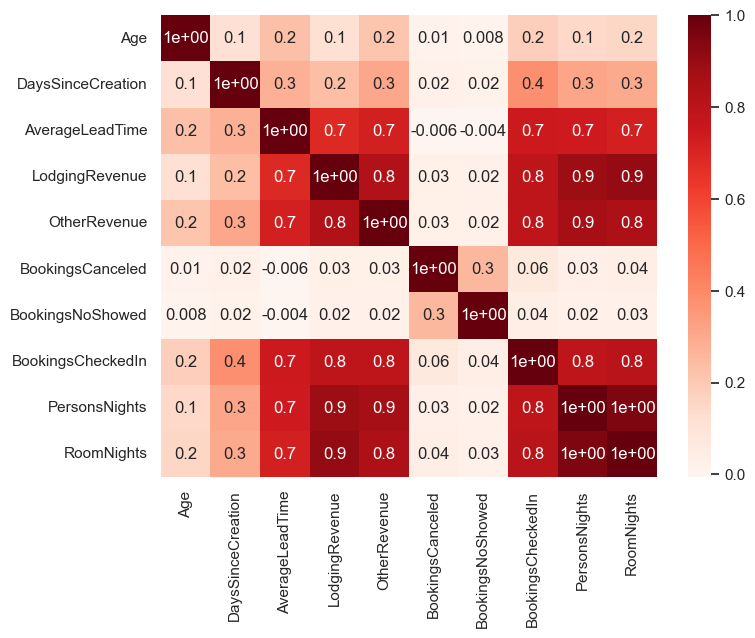

In [112]:
cor_heatmap(cor_spearman)

High Corr Variables: 
- AverageLeadTime vs LodgingRevenue (0.7)
- AverageLeadTime vs OtherRevenue (0.7)
- AverageLeadTime vs BookingsCheckedIn (0.7)
- AverageLeadTime vs PersonsNights (0.7)
- AverageLeadTime vs RoomNights (0.7)
- LodgingRevenue vs OtherRevenue (0.8)
- LodgingRevenue vs BookingsCheckedIn (0.8)
- LodgingRevenue vs PersonsNights (0.9)
- LodgingRevenue vs RoomNights (0.9)
- OtherRevenue vs BookingsCheckedIn (0.8)
- OtherRevenue vs PersonsNights (0.9)
- OtherRevenue vs RoomNights (0.9)
- BookingsCheckedIn vs PersonsNights (0.9)
- BookingsCheckedIn vs RoomNights (0.9)
- PersonsNights vs RoomNights (0.95)

More Suggestions: 
- We should merge the Revenues in one variable